<a href="https://colab.research.google.com/github/Siyuuuuuu/Dissert/blob/main/Dissertation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install -U KTBoost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!git clone https://github.com/uoe-iaml/DL-S2-2022-CW2.git

Cloning into 'DL-S2-2022-CW2'...
remote: Enumerating objects: 29, done.
remote: Counting objects: 100% (29/29), done.
remote: Compressing objects: 100% (26/26), done.
remote: Total 29 (delta 11), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (29/29), done.


In [ ]:
!git clone https://github.com/Siyuuuuuu/Dissertation.git

Cloning into 'Dissertation'...
fatal: could not read Username for 'https://github.com': No such device or address


In [ ]:
!git clone https://github.com/Siyuuuuuu/Dissertation.git

Cloning into 'Dissertation'...
fatal: could not read Username for 'https://github.com': No such device or address


In [ ]:
!git clone https://github.com/Siyuuuuuu/Dissert.git

Cloning into 'Dissert'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 9 (delta 1), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (9/9), done.


In [ ]:
!git init
!git add Dissertation.ipynb
!git commit -m "first commit"
!git branch -M main
!git remote add origin https://github.com/Siyuuuuuu/Dissert.git
!git push -u origin main

Initialized empty Git repository in /content/.git/
fatal: pathspec 'Dissertation.ipynb' did not match any files

*** Please tell me who you are.

Run

  git config --global user.email "you@example.com"
  git config --global user.name "Your Name"

to set your account's default identity.
Omit --global to set the identity only in this repository.

fatal: unable to auto-detect email address (got 'root@8b1eee024bff.(none)')
error: refname refs/heads/master not found
fatal: Branch rename failed
error: src refspec main does not match any.
error: failed to push some refs to 'https://github.com/Siyuuuuuu/Dissert.git'


In [ ]:
! git config --global user.email "s2263019@ed.ac.uk"
! git config --global user.name "Siyu Ji"

In [ ]:
!git remote add origin https://github.com/Siyuuuuuu/Dissertation.git
!git branch -M main
!git push -u origin main

fatal: remote origin already exists.
error: refname refs/heads/master not found
fatal: Branch rename failed
error: src refspec main does not match any.
error: failed to push some refs to 'https://github.com/Siyuuuuuu/Dissert.git'


# Templete Dataset for Tobit/Other models

In [3]:
pip install -U KTBoost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 59 kB 3.0 MB/s 
     |████████████████████████████████| 355 kB 10.4 MB/s 


In [4]:
import sklearn.datasets as datasets
import numpy as np
import KTBoost.KTBoost as KTBoost
import random
import matplotlib.pyplot as plt

In [5]:
# simulate data
random.seed(10)
n = 1000
X, lp = datasets.make_friedman3(n_samples=n)
X_test, y_test = datasets.make_friedman3(n_samples=n)
lp = lp*5+0.2
y_test = y_test*5+0.2
y=np.random.normal(loc=lp,scale=1)

In [6]:
help(datasets.make_friedman3)

Help on function make_friedman3 in module sklearn.datasets._samples_generator:

make_friedman3(n_samples=100, *, noise=0.0, random_state=None)
    Generate the "Friedman #3" regression problem.
    
    This dataset is described in Friedman [1] and Breiman [2].
    
    Inputs `X` are 4 independent features uniformly distributed on the
    intervals::
    
        0 <= X[:, 0] <= 100,
        40 * pi <= X[:, 1] <= 560 * pi,
        0 <= X[:, 2] <= 1,
        1 <= X[:, 3] <= 11.
    
    The output `y` is created according to the formula::
    
        y(X) = arctan((X[:, 1] * X[:, 2] - 1 / (X[:, 1] * X[:, 3])) / X[:, 0]) + noise * N(0, 1).
    
    Read more in the :ref:`User Guide <sample_generators>`.
    
    Parameters
    ----------
    n_samples : int, default=100
        The number of samples.
    
    noise : float, default=0.0
        The standard deviation of the gaussian noise applied to the output.
    
    random_state : int, RandomState instance or None, default=None
    

In [7]:
# apply censoring
yu=8
yl=5
y[y>=yu]=yu
y[y<=yl]=yl

# create binary variable 0 & 1 for training datasets
y_binary_01 = np.ones(len(y))
y_binary_01[y<yu] = 0

# create binary variable -1 & 1
y_binary_11 = np.ones(len(y))
y_binary_11[y<yu] = -1

# create binary variable 0 & 1 for testing datasets
y_binary_tt01 = np.ones(len(y_test))
y_binary_tt01[y_test<yu] = 0

# create binary variable -1 & 1
y_binary_tt11 = np.ones(len(y_test))
y_binary_tt11[y_test<yu] = -1

(array([168.,  25.,  39.,  46.,  61.,  59.,  69.,  81.,  80., 372.]),
 array([5. , 5.3, 5.6, 5.9, 6.2, 6.5, 6.8, 7.1, 7.4, 7.7, 8. ]),
 <a list of 10 Patch objects>)

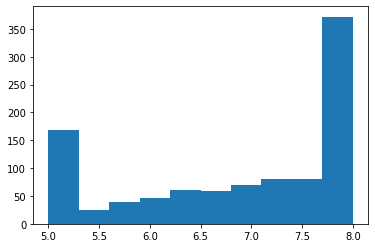

In [8]:
plt.hist(y)

(array([ 10.,  16.,  17.,  20.,  16.,  20.,  48.,  72., 192., 589.]),
 array([0.20080145, 0.98599718, 1.7711929 , 2.55638863, 3.34158435,
        4.12678008, 4.9119758 , 5.69717153, 6.48236725, 7.26756298,
        8.0527587 ]),
 <a list of 10 Patch objects>)

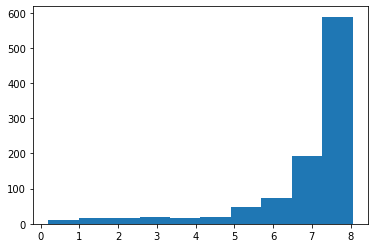

In [9]:
plt.hist(y_test)

# Tobit Model

In [186]:
import math as math
import numpy as np
from scipy.stats import norm
from numpy.random import randn
from scipy.optimize import minimize
from sklearn.linear_model import LinearRegression

class TobitRegression(object):
  
  def __init__(self, y, X, yl, yu, sigma=1):
    '''
    initialize tobitregression
    '''
    self.y = y
    self.X = np.hstack([np.ones((X.shape[0],1)), X]) # add one column 1 to the matrix for intercept
    self.X_no_intercept = X
    self.yl = yl
    self.yu = yu
    self.sigma = sigma
    self.const = 0.5 * np.log(2 * math.pi) + np.log(sigma)
    self.beta_ = None # np.array for n+1 elements, intercept + # features
    
  def tobit_cost_function(self, beta):
    '''
    return tobit cost: n_array
    '''
    pred = self.X.dot(beta).ravel()
    y = self.y
    yl = self.yl
    yu = self.yu
    const = self.const
    diff = (y - pred) / self.sigma
    indl = (y == yl)
    indu = (y == yu)
    indmid = (y > yl) & (y < yu)
    loss = (np.sum((diff[indmid] ** 2.0)/2 + const) - np.sum(norm.logcdf(diff[indl])) - np.sum(norm.logcdf(-diff[indu])))
      
    return loss

  def negative_gradient(self, beta):
    '''
    return negative gradient of tobit loss: n_array
    '''
    pred = self.X.dot(beta).ravel()
    X = self.X
    y = self.y
    yl = self.yl
    yu = self.yu
    sigma = self.sigma

    diff = (y - pred)/sigma
    indl = (y == yl)
    indu = (y == yu)
    indmid = (y > yl) & (y < yu)
    
    beta_der = np.zeros((X.shape[1],),dtype = np.float64) # initialize num of betas
    residual = np.zeros((y.shape[0],), dtype=np.float64) # array size n*1, n = sample size
    residual[indl] = (- np.exp(norm.logpdf(diff[indl])- norm.logcdf(diff[indl])) / sigma)
    residual[indmid] = diff[indmid] / sigma
    residual[indu] = (np.exp(norm.logpdf(diff[indu]) - norm.logcdf(-diff[indu])) / sigma)

    beta_der = X.T.dot(residual) # get the partial derivatives for betas
    
    return beta_der

  def fit(self):
    '''
    return optimal value of beta by bfgs algothrism: n_array
    '''
    # define the initial start parameters as result of linear regression
    lin_reg = LinearRegression()
    lin_reg.fit(self.X_no_intercept,self.y)
    beta_st = np.append(lin_reg.intercept_, lin_reg.coef_) + randn(self.X.shape[1])*0.0015

    result_beta = minimize(self.tobit_cost_function, beta_st, method='BFGS',jac=self.negative_gradient)
    self.beta_ = result_beta['x']

    return self

  def predict(self, X):
    '''
    given X, predict Y for tobit regression
    '''
    X = np.hstack([np.ones((X.shape[0],1)), X])
    beta = self.beta_
    pred = X.dot(beta).ravel()
    yl = self.yl
    yu = self.yu

    indl = (pred <= yl)
    indu = (pred >= yu)
    indmid = (pred > yl) & (pred < yu)

    y_pred = pred
    y_pred[indl] = yl
    y_pred[indu] = yu

    return y_pred

  def score(self, y, y_pred):
    return np.sum((y - y_pred)**2) / len(y)


In [189]:
tobit = TobitRegression(y, X, yl, yu)
tobit.fit()
tobit.beta_

In [190]:
tobit.predict(X_test)

array([5.        , 5.53789114, 5.39382447, 5.55578765, 7.12616981,
       5.10120628, 6.1616018 , 5.        , 7.01666607, 6.03908671,
       5.54199455, 5.71475916, 6.26783314, 5.59910807, 6.27487995,
       5.        , 6.82676219, 5.39991645, 5.30932343, 5.09191286,
       6.22978532, 5.        , 5.        , 5.7187223 , 5.71528582,
       6.09645154, 5.78450889, 5.51310436, 7.42631538, 5.9560968 ,
       5.29414877, 6.0051593 , 5.08988012, 5.71698134, 5.33938317,
       5.        , 6.9308338 , 5.07936242, 6.38432172, 5.82949337,
       5.30292558, 5.9118261 , 6.82701611, 5.30519687, 5.29438419,
       6.22041153, 5.43408157, 6.19349891, 5.602095  , 5.30437584,
       5.35277854, 6.80299077, 5.39091049, 6.23179298, 6.44086584,
       7.24037592, 5.        , 7.16103694, 5.90740409, 5.90782874,
       5.2770168 , 5.45954544, 5.        , 7.44966319, 5.49405091,
       5.        , 6.45902646, 6.34753686, 5.87029668, 5.99915924,
       5.23168025, 6.31541133, 5.46595929, 6.62593353, 5.18160

In [191]:
tobit.score(y_test, tobit.predict(X_test))

2.8300133758913897

In [192]:
lin_reg = LinearRegression()
lin_reg.fit(X,y)
np.append(lin_reg.intercept_, lin_reg.coef_) 

array([ 5.99589466e+00, -1.30926343e-02,  7.28146301e-04,  1.81919666e+00,
       -1.46216273e-03])

In [193]:
np.append(lin_reg.intercept_, lin_reg.coef_) == tobit.beta_

array([False, False, False, False, False])

In [194]:
np.sum((y_test - lin_reg.predict(X_test))**2)/len(y_test)

1.2028966386995195

# Grabit Model

# Gradient Boosting Model